In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers

In [2]:
# Load the MNISt dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Shape of the images
print(x_train.shape)

(60000, 28, 28)


In [4]:
# Shape of the labels
print(y_train.shape)

(60000,)


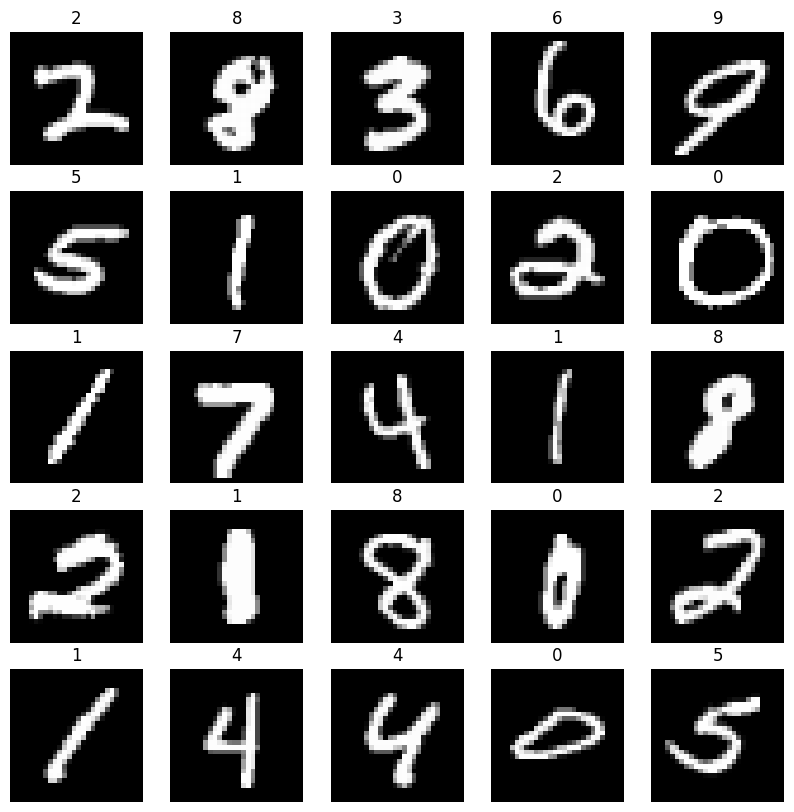

In [5]:
# Plot a random sample of 25 training images and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[idx]))
plt.show()

In [6]:
# Create a CNN using tf.keras.Sequential.

def build_model():
    model = tf.keras.Sequential()

    # Stage 1
    model.add(layers.Conv2D(8, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    # output shape: (14, 14, 8)

    # Stage 2
    model.add(layers.Conv2D(16, (3, 3), padding="same", activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    # output shape: (7, 7, 16)

    # Stage 3
    model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
    # output shape: (7, 7, 32)

    # Stage 4
    model.add(layers.Flatten())
    # output shape: (1568)

    # Stage 5
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.2))
    # output shape: (128)

    # Stage 6
    model.add(layers.Dense(10, activation="softmax"))
    # output shape: (10)

    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [7]:
# Compile the model using the "adam" optimizer, "sparse_categorical_crossentropy" loss function, and "accuracy" metric.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Let's make sure this will run on the GPU.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.15.0


Epoch 1/10
1875/1875 [==============================] - 25s 6ms/step - loss: 0.3011 - accuracy: 0.9329 - val_loss: 0.0641 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0825 - accuracy: 0.9753 - val_loss: 0.0669 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0482 - val_accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0506 - accuracy: 0.9849 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0685 - val_accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0602 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0582 - val_accurac

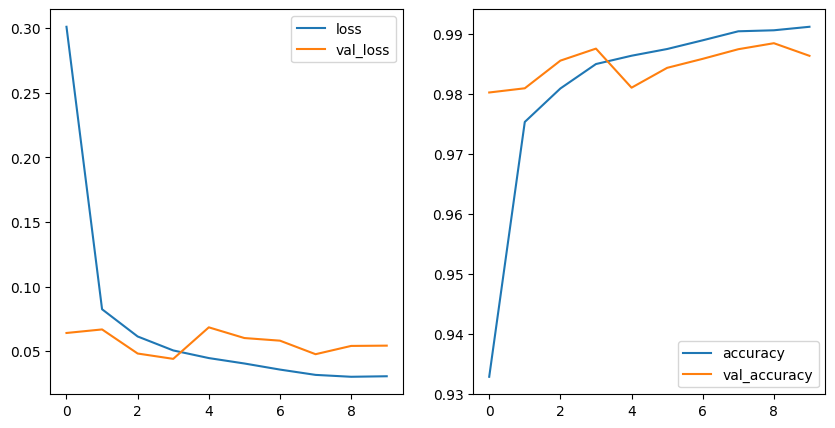

In [9]:
# Train the model for 10 epochs, and validate it on the test set.
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the learning curves.
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()